In [2209]:
# Initialize and import

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import geopandas as gpd

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

pd.set_option('display.max_columns', None)


In [2210]:
# Load data

df = pd.read_csv("houses.csv")
df.head()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",-,-,-,Service Residence,2,-,Non Bumi Lot,VE,30338,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",-,-,-,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,-,-,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",-,-,-,Flat,1,-,Non Bumi Lot,E,11584,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",-,43,956,Studio,-,Low,Bumi Lot,E,31916,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [2211]:
df.shape

(4000, 32)

In [2212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             4000 non-null   object
 1   Bedroom                 4000 non-null   object
 2   Bathroom                4000 non-null   object
 3   Property Size           4000 non-null   object
 4   Nearby School           687 non-null    object
 5   Nearby Mall             365 non-null    object
 6   Ad List                 4000 non-null   int64 
 7   Category                4000 non-null   object
 8   Facilities              4000 non-null   object
 9   Building Name           4000 non-null   object
 10  Developer               4000 non-null   object
 11  Tenure Type             4000 non-null   object
 12  Address                 4000 non-null   object
 13  Completion Year         4000 non-null   object
 14  # of Floors             4000 non-null   object
 15  Tota

In [2213]:
# Column Modification

df = df.drop(['description','Ad List','Firm Type','Firm Number','REN Number','# of Floors', 'Developer'] , axis = 1)

df = df.rename(columns = {'Bedroom' : 'Number of Bedroom'})
df = df.rename(columns = {'Bathroom' : 'Number of Bathroom'})

df = df.loc[:,['Address','Property Type','Property Size','Number of Bedroom','Number of Bathroom','Parking Lot','Floor Range','Completion Year','Tenure Type','Land Title','Facilities', 'Nearby School','School','Mall','Nearby Mall','Highway','Railway Station','Nearby Railway Station','Bus Stop','Park','Hospital', 'price']]

In [2214]:
# Analyzing the data

print(df['Property Type'].unique())
print(df['Number of Bedroom'].unique())
print(df['Number of Bathroom'].unique())
print(df['Parking Lot'].unique())
print(df['Floor Range'].unique())
print(df['Completion Year'].unique())
print(df['Tenure Type'].unique()) #Freehold, Leasehold
print(df['Land Title'].unique()) # Non Bumi Lot, Bumi Lot, Malay Reserved(Removed)
print(df['Facilities'].unique())
#print(df['Developer'].unique()) 
# Dropped developer because too many values


['Service Residence' 'Apartment' 'Flat' 'Studio' 'Condominium' 'Others'
 'Townhouse Condo' 'Duplex']
['4' '3' '1' '2' '5' '6' '-' '10' '8']
['2' '1' '3' '4' '5' '-' '6' '7' '8']
['2' '1' '-' '3' '4' '5' '9' '10' '6']
['-' 'Low' 'Medium' 'High']
['-' '2007' '2010' '2000' '2008' '2021' '2016' '1990' '1998' '2020' '2018'
 '2015' '2019' '2014' '2002' '1999' '2017' '2006' '2023' '2011' '2003'
 '2013' '2022' '1993' '1995' '1997' '2012' '1996' '2009' '2001' '2005'
 '2004' '1989' '2026' '2024' '2025' '1994' '1992' '1991' '1987' '1985']
['Freehold' 'Leasehold']
['Non Bumi Lot' 'Bumi Lot' 'Malay Reserved']
['-'
 'Parking, Security, Swimming Pool, Playground, Barbeque area, Jogging Track'
 'Playground, Minimart, Jogging Track, Barbeque area, Parking, Security, Lift'
 ...
 'Security, Gymnasium, Tennis Court, Sauna, Playground, Squash Court, Club house, Parking, Minimart, Swimming Pool, Lift'
 'Gymnasium, Playground, Swimming Pool, Jogging Track, Sauna, Club house, Security, Barbeque area, Multipur

In [2215]:
# Drop rows with value of 'Others' from 'Property Type' Column

df.drop(df[df['Property Type'] == 'Others'].index, inplace = True)
df['Property Type'].value_counts()

Property Type
Condominium          1714
Apartment            1494
Service Residence     506
Flat                  247
Studio                 13
Duplex                  5
Townhouse Condo         4
Name: count, dtype: int64

In [2216]:
# Show the count value

df['Land Title'].value_counts()

Land Title
Non Bumi Lot      3346
Bumi Lot           629
Malay Reserved       8
Name: count, dtype: int64

In [2217]:
# Drop rows with value of 'Malay Reserved' from 'Tenure Type' Column

df.drop(df[df['Land Title'] == 'Malay Reserved'].index, inplace=True)

# Show the count value
df['Land Title'].value_counts()

Land Title
Non Bumi Lot    3346
Bumi Lot         629
Name: count, dtype: int64

In [2218]:
df.head()

,Address,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Completion Year,Tenure Type,Land Title,Facilities,Nearby School,School,Mall,Nearby Mall,Highway,Railway Station,Nearby Railway Station,Bus Stop,Park,Hospital,price
0,"Jalan Gombak, Setapak, Kuala Lumpur",Service Residence,1000 sq.ft.,4,2,2,-,-,Freehold,Non Bumi Lot,-,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,Setapak Central,NaN,NaN,NaN,Bus Stop Starparc Point\nBus Stop Setapak Cent...,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Columbia Asia Hospital,RM 340 000
1,"Jalan Kenanga 3/8, Melaka City, Melaka",Apartment,980 sq.ft.,3,2,1,Low,-,Freehold,Non Bumi Lot,"Parking, Security, Swimming Pool, Playground, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 250 000
2,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",Apartment,1000 sq.ft.,3,2,1,Medium,2007,Freehold,Non Bumi Lot,"Playground, Minimart, Jogging Track, Barbeque ...",NaN,NaN,NaN,NaN,SILK Sg Ramal (T) Toll Plaza,NaN,NaN,NaN,NaN,NaN,RM 230 000
3,"jalan pandan indah 3/3, Selangor, Ampang",Flat,592 sq.ft.,3,1,1,-,-,Leasehold,Non Bumi Lot,"Parking, Playground, Minimart, Jogging Track",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 158 000
4,"Jalan Plumbum 7/102, Shah Alam, Selangor",Studio,467 sq.ft.,1,1,-,Low,-,Freehold,Bumi Lot,"Minimart, Gymnasium, Parking, Security",Sekolah Jenis Kebangsaan (T) Ladang Midlands,Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,i-Soho i-City\nGulati\nCentral i-City Shopping...,i-Soho i-City,NaN,NaN,NaN,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000


In [2219]:
# Converting 'Completion Year' to 'Age of Unit'

# Convert to numeric, handling errors
df['Completion Year'] = pd.to_numeric(df['Completion Year'], errors='coerce')  

current_year = datetime.now().year
df['Age of Unit'] = current_year - df['Completion Year']

# Replace NaN values with the mean of the 'Age of Unit' column
df['Age of Unit'].fillna(df['Age of Unit'].mean(), inplace=True)

# Convert 'Completion Year' to integer
df['Age of Unit'] = df['Age of Unit'].astype(int)

#Rearrange column
df = df.loc[:,['Address','Property Type','Property Size','Number of Bedroom','Number of Bathroom','Parking Lot','Floor Range','Age of Unit','Tenure Type', 'Land Title', 'Facilities','Nearby School','School','Mall','Nearby Mall','Highway','Railway Station','Nearby Railway Station','Bus Stop','Park', 'Hospital', 'price']]


In [2220]:
df.head(5)

,Address,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Facilities,Nearby School,School,Mall,Nearby Mall,Highway,Railway Station,Nearby Railway Station,Bus Stop,Park,Hospital,price
0,"Jalan Gombak, Setapak, Kuala Lumpur",Service Residence,1000 sq.ft.,4,2,2,-,12,Freehold,Non Bumi Lot,-,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,Setapak Central,NaN,NaN,NaN,Bus Stop Starparc Point\nBus Stop Setapak Cent...,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Columbia Asia Hospital,RM 340 000
1,"Jalan Kenanga 3/8, Melaka City, Melaka",Apartment,980 sq.ft.,3,2,1,Low,12,Freehold,Non Bumi Lot,"Parking, Security, Swimming Pool, Playground, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 250 000
2,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",Apartment,1000 sq.ft.,3,2,1,Medium,17,Freehold,Non Bumi Lot,"Playground, Minimart, Jogging Track, Barbeque ...",NaN,NaN,NaN,NaN,SILK Sg Ramal (T) Toll Plaza,NaN,NaN,NaN,NaN,NaN,RM 230 000
3,"jalan pandan indah 3/3, Selangor, Ampang",Flat,592 sq.ft.,3,1,1,-,12,Leasehold,Non Bumi Lot,"Parking, Playground, Minimart, Jogging Track",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 158 000
4,"Jalan Plumbum 7/102, Shah Alam, Selangor",Studio,467 sq.ft.,1,1,-,Low,12,Freehold,Bumi Lot,"Minimart, Gymnasium, Parking, Security",Sekolah Jenis Kebangsaan (T) Ladang Midlands,Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,i-Soho i-City\nGulati\nCentral i-City Shopping...,i-Soho i-City,NaN,NaN,NaN,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000


In [2221]:
# Get 'State' from 'Address' 

def get_state(x):
    state_list = ["Johor","Kedah","Kelantan","Kuala Lumpur","Melaka","Negeri Sembilan",'Penang',"Pahang","Perak","Perlis","Pulau Pinang","Sabah","Sarawak","Selangor","Terengganu","Labuan","Putrajaya"]
    if pd.notnull(x):
        x_list = x.split(',')
        stripped = [s.strip(' ') for s in x_list]
        try:
            return list(set(state_list) & set(stripped)) [0]
        except:
            #print(x)
            return np.NaN
    else:
        return np.NaN
    
# state = df['Address'].apply(get_state)
# df.insert(4, 'State', state)
# df.head(5)

# Create a new 'State' column
df['State'] = df['Address'].apply(get_state)

# Move 'State' column to the first position
df = df[['State'] + [col for col in df.columns if col != 'State']]

# Drop the original 'Address' column
df.drop('Address', axis=1, inplace=True)

df.head(5)

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Facilities,Nearby School,School,Mall,Nearby Mall,Highway,Railway Station,Nearby Railway Station,Bus Stop,Park,Hospital,price
0,Kuala Lumpur,Service Residence,1000 sq.ft.,4,2,2,-,12,Freehold,Non Bumi Lot,-,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,Setapak Central,NaN,NaN,NaN,Bus Stop Starparc Point\nBus Stop Setapak Cent...,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Columbia Asia Hospital,RM 340 000
1,Melaka,Apartment,980 sq.ft.,3,2,1,Low,12,Freehold,Non Bumi Lot,"Parking, Security, Swimming Pool, Playground, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 250 000
2,Selangor,Apartment,1000 sq.ft.,3,2,1,Medium,17,Freehold,Non Bumi Lot,"Playground, Minimart, Jogging Track, Barbeque ...",NaN,NaN,NaN,NaN,SILK Sg Ramal (T) Toll Plaza,NaN,NaN,NaN,NaN,NaN,RM 230 000
3,Selangor,Flat,592 sq.ft.,3,1,1,-,12,Leasehold,Non Bumi Lot,"Parking, Playground, Minimart, Jogging Track",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 158 000
4,Selangor,Studio,467 sq.ft.,1,1,-,Low,12,Freehold,Bumi Lot,"Minimart, Gymnasium, Parking, Security",Sekolah Jenis Kebangsaan (T) Ladang Midlands,Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,i-Soho i-City\nGulati\nCentral i-City Shopping...,i-Soho i-City,NaN,NaN,NaN,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000


In [2222]:
# Replace '-' with 'NaN'

df.replace("-", np.nan, inplace=True)

In [2223]:
# Handling missing data

# Fill in missing values of 'Parking Lot' with '0'
df['Parking Lot'].fillna('0', inplace=True)



# Fill in missing values of 'Floor Range' with its mode
mode_floor_range = df['Floor Range'].mode()[0]

# Fill NaN values with the mode
df['Floor Range'].fillna(mode_floor_range, inplace=True)

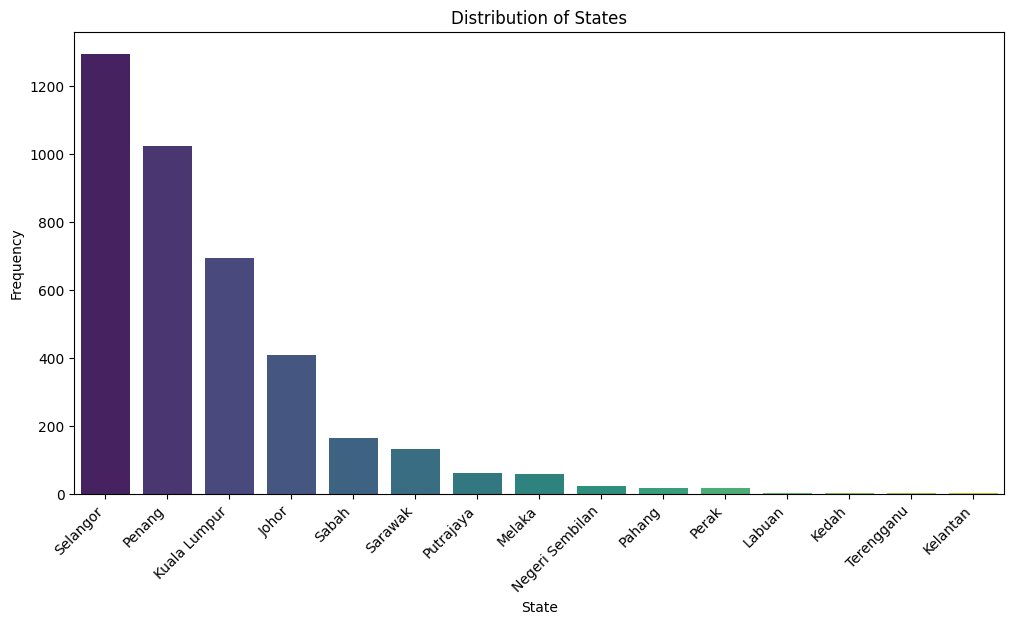

Summary Statistics for States:
State
Selangor           1295
Penang             1024
Kuala Lumpur        693
Johor               407
Sabah               163
Sarawak             130
Putrajaya            59
Melaka               58
Negeri Sembilan      23
Pahang               17
Perak                15
Labuan                2
Kedah                 2
Terengganu            1
Kelantan              1
Name: count, dtype: int64


In [2224]:
# 'State' distribution

state_distribution = df['State'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_distribution.index, y=state_distribution.values, palette="viridis", hue=state_distribution.index)
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Summary Statistics for States:")
print(df['State'].value_counts())

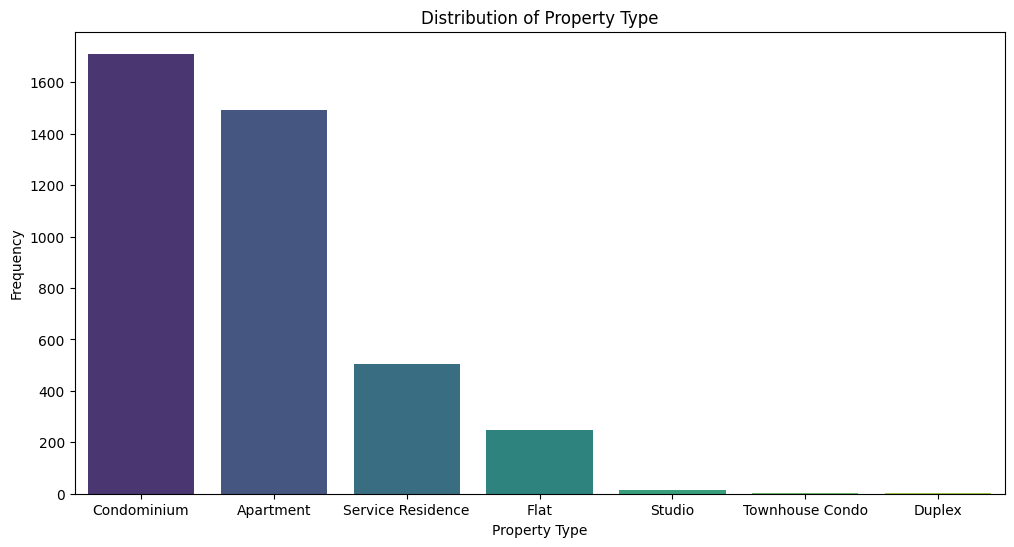

Summary Statistics for Property Type:
Property Type
Condominium          1711
Apartment            1491
Service Residence     506
Flat                  247
Studio                 13
Townhouse Condo         4
Duplex                  3
Name: count, dtype: int64


In [2225]:
# 'Property Type' Distribution

property_type_distribution = df['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=property_type_distribution.index, y=property_type_distribution.values, palette="viridis", hue=property_type_distribution.index)
plt.title('Distribution of Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')

plt.show()

print("Summary Statistics for Property Type:")
print(df['Property Type'].value_counts())

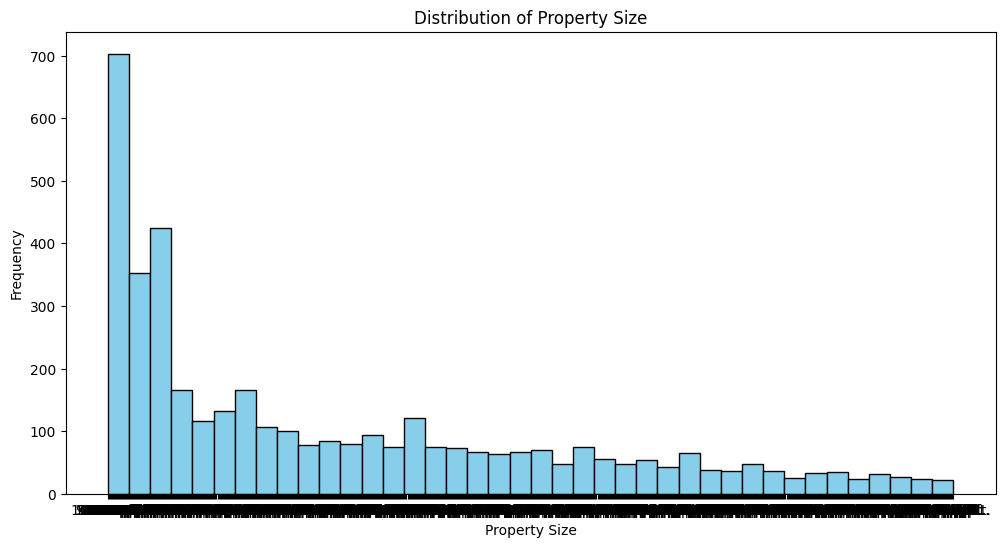

Summary Statistics for Property Size:
count           3975
unique           842
top       700 sq.ft.
freq             199
Name: Property Size, dtype: object


In [2226]:
# 'Property Size' Distribution

plt.figure(figsize=(12, 6))
plt.hist(df['Property Size'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Size')
plt.xlabel('Property Size')
plt.ylabel('Frequency')

plt.show()

print("Summary Statistics for Property Size:")
print(df['Property Size'].describe())

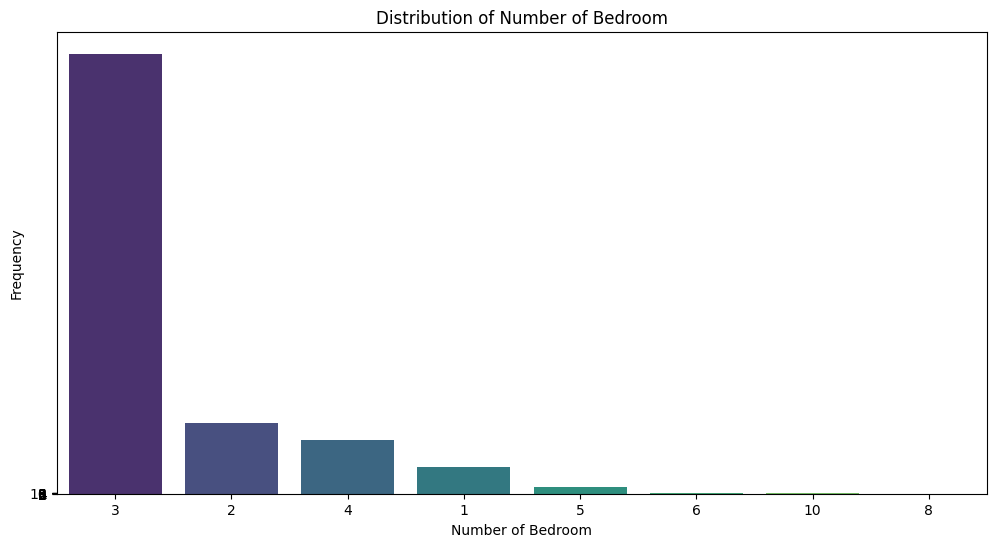

Summary Statistics for Number of Bedroom:
Number of Bedroom
3     2914
2      470
4      359
1      178
5       44
6        7
10       2
8        1
Name: count, dtype: int64


In [2227]:
# 'Number of Bedroom' Distribution

bedroom_distribution = df['Number of Bedroom'].value_counts().sort_values(ascending=False)

# Convert Number of Bedroom to categorical with desired order
bedroom_order = bedroom_distribution.index
df['Number of Bedroom'] = pd.Categorical(df['Number of Bedroom'], categories=bedroom_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Bedroom', y='Number of Bedroom', data=df, estimator=lambda x: len(x), palette="viridis", hue='Number of Bedroom')
plt.gca().invert_yaxis()
plt.title('Distribution of Number of Bedroom')
plt.xlabel('Number of Bedroom')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Number of Bedroom:")
print(bedroom_distribution)

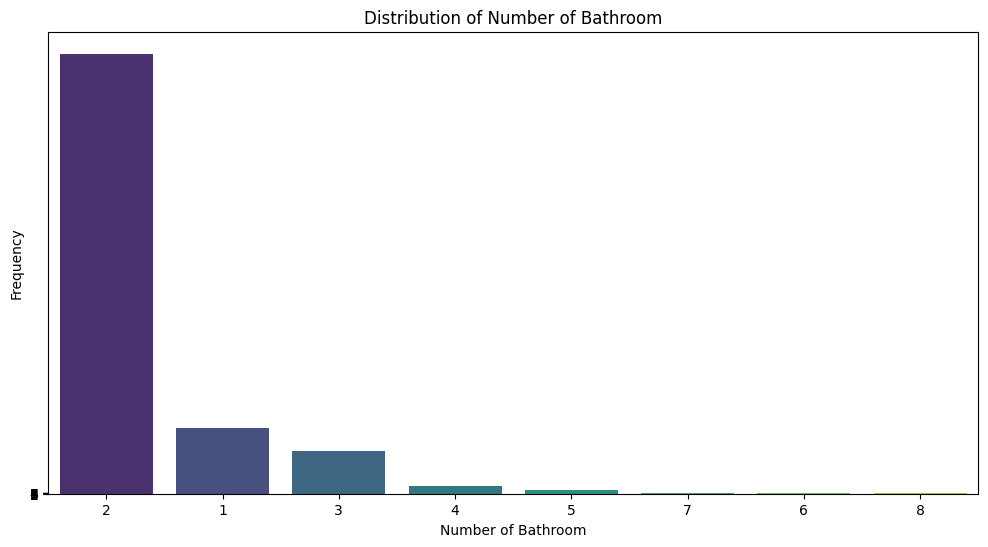

Summary Statistics for Number of Bathroom:
Number of Bathroom
2    3113
1     468
3     303
4      57
5      26
7       4
6       2
8       2
Name: count, dtype: int64


In [2228]:
# 'Number of Bathroom' Distribution

# Get Number of Bathroom distribution and sort by frequency
bathroom_distribution = df['Number of Bathroom'].value_counts().sort_values(ascending=False)

# Convert Number of Bathroom to categorical with desired order
bathroom_order = bathroom_distribution.index
df['Number of Bathroom'] = pd.Categorical(df['Number of Bathroom'], categories=bathroom_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Bathroom', y='Number of Bathroom', data=df, estimator=lambda x: len(x), palette="viridis", hue='Number of Bathroom')
plt.gca().invert_yaxis()
plt.title('Distribution of Number of Bathroom')
plt.xlabel('Number of Bathroom')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Number of Bathroom:")
print(bathroom_distribution)

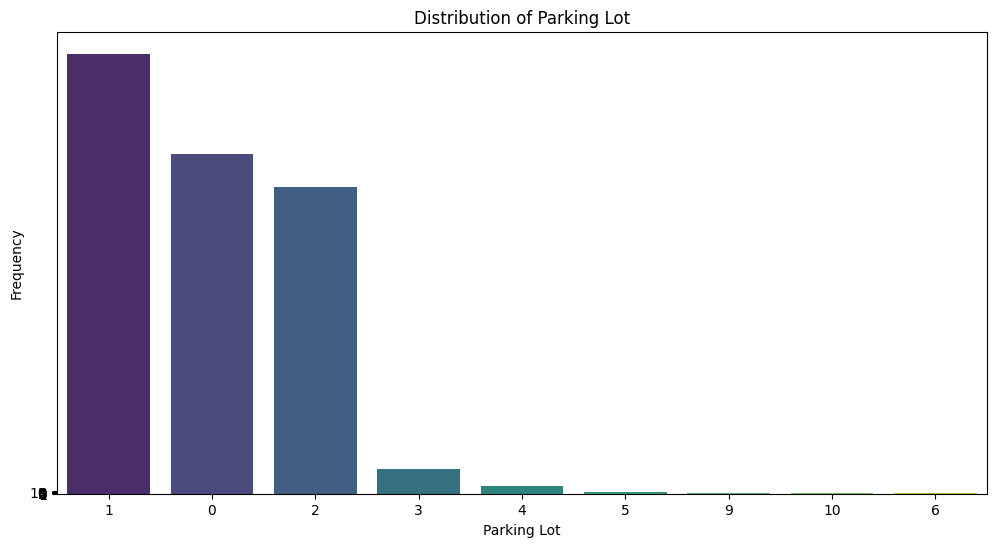

Summary Statistics for Parking Lot:
Parking Lot
1     1559
0     1205
2     1088
3       87
4       26
5        5
9        2
10       2
6        1
Name: count, dtype: int64


In [2229]:
# 'Parking Lot' Distribution

# Get Parking Lot distribution and sort by frequency
parking_lot_distribution = df['Parking Lot'].value_counts().sort_values(ascending=False)

# Convert Parking Lot to categorical with desired order
parking_lot_order = parking_lot_distribution.index
df['Parking Lot'] = pd.Categorical(df['Parking Lot'], categories=parking_lot_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Parking Lot', y='Parking Lot', data=df, estimator=lambda x: len(x), palette="viridis", hue='Parking Lot')
plt.gca().invert_yaxis()
plt.title('Distribution of Parking Lot')
plt.xlabel('Parking Lot')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Parking Lot:")
print(parking_lot_distribution)

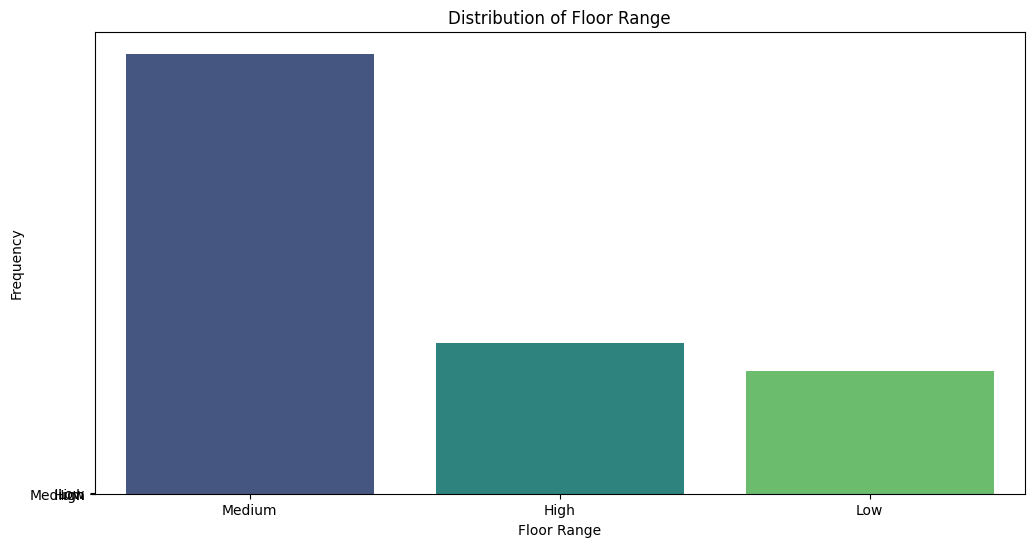

Summary Statistics for Floor Range:
Floor Range
Medium    2450
High       842
Low        683
Name: count, dtype: int64


In [2230]:
# 'Floor Range' Distribution

# Get Floor Range distribution and sort by frequency
floor_range_distribution = df['Floor Range'].value_counts().sort_values(ascending=False)

# Convert Floor Range to categorical with desired order
floor_range_order = floor_range_distribution.index
df['Floor Range'] = pd.Categorical(df['Floor Range'], categories=floor_range_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Floor Range', y='Floor Range', data=df, estimator=lambda x: len(x), palette="viridis", hue='Floor Range')
plt.gca().invert_yaxis()
plt.title('Distribution of Floor Range')
plt.xlabel('Floor Range')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Floor Range:")
print(floor_range_distribution)

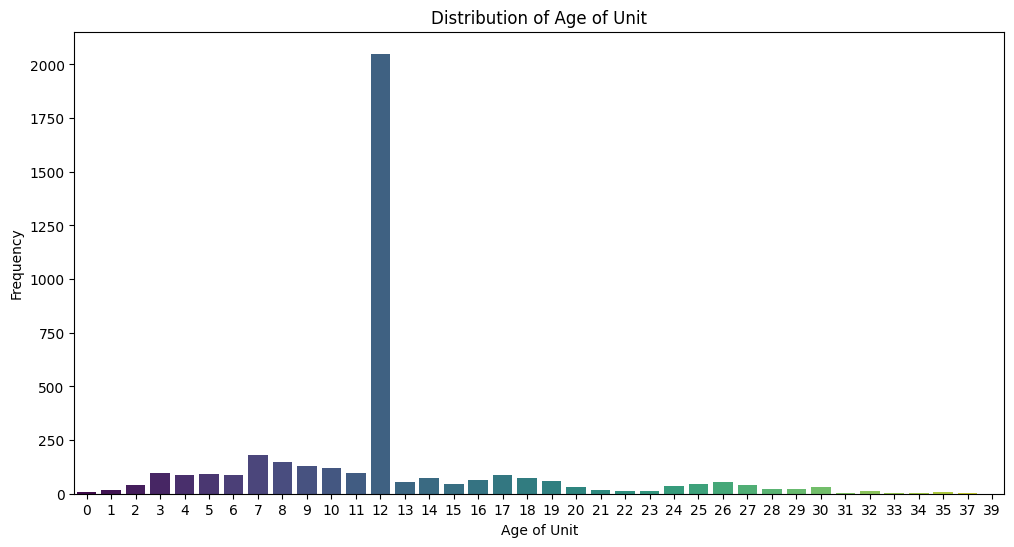

Summary Statistics for Age of Unit:
Age of Unit
12    2050
7      179
8      149
9      130
10     118
3       98
11      95
5       91
17      85
6       85
4       85
18      72
14      71
16      65
19      58
26      56
13      54
25      44
15      44
27      41
2       39
24      36
20      33
30      30
28      24
29      20
1       19
21      18
22      15
23      13
32      13
35       7
0        6
31       5
33       5
37       4
34       2
39       1
Name: count, dtype: int64


In [2231]:
# 'Age of Unit' Distribution

# Drop rows with negative values in 'Age of Unit'
df = df[df['Age of Unit'] >= 0]

# Get Age of Unit distribution and sort by frequency
age_of_unit_distribution = df['Age of Unit'].value_counts().sort_values(ascending=False)

# Convert Age of Unit to categorical with desired order
age_of_unit_order = age_of_unit_distribution.index
df['Age of Unit Categorical'] = pd.Categorical(df['Age of Unit'], categories=age_of_unit_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Age of Unit', y='Age of Unit', data=df, estimator=lambda x: len(x), palette="viridis", hue='Age of Unit', legend=False)
plt.title('Distribution of Age of Unit')
plt.xlabel('Age of Unit')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Age of Unit:")
print(age_of_unit_distribution)


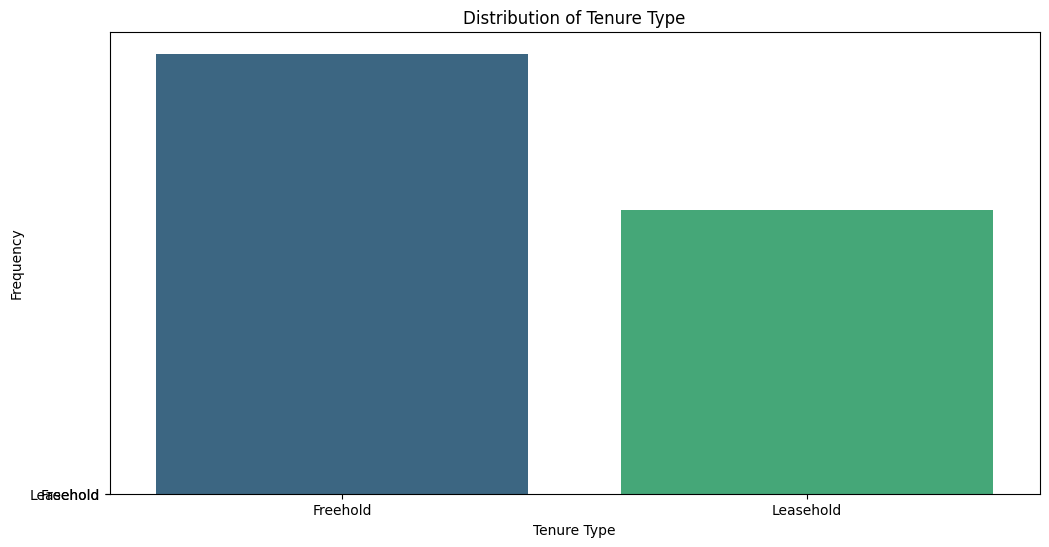

Summary Statistics for Tenure Type:
Tenure Type
Freehold     2407
Leasehold    1553
Name: count, dtype: int64


In [2232]:
# 'Tenure Type' Distribution

# Get Tenure Type distribution and sort by frequency
tenure_type_distribution = df['Tenure Type'].value_counts().sort_values(ascending=False)

# Convert Tenure Type to categorical with desired order
tenure_type_order = tenure_type_distribution.index
df['Tenure Type'] = pd.Categorical(df['Tenure Type'], categories=tenure_type_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Tenure Type', y='Tenure Type', data=df, estimator=lambda x: len(x), palette="viridis", hue='Tenure Type')
plt.gca().invert_yaxis()
plt.title('Distribution of Tenure Type')
plt.xlabel('Tenure Type')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Tenure Type:")
print(tenure_type_distribution)


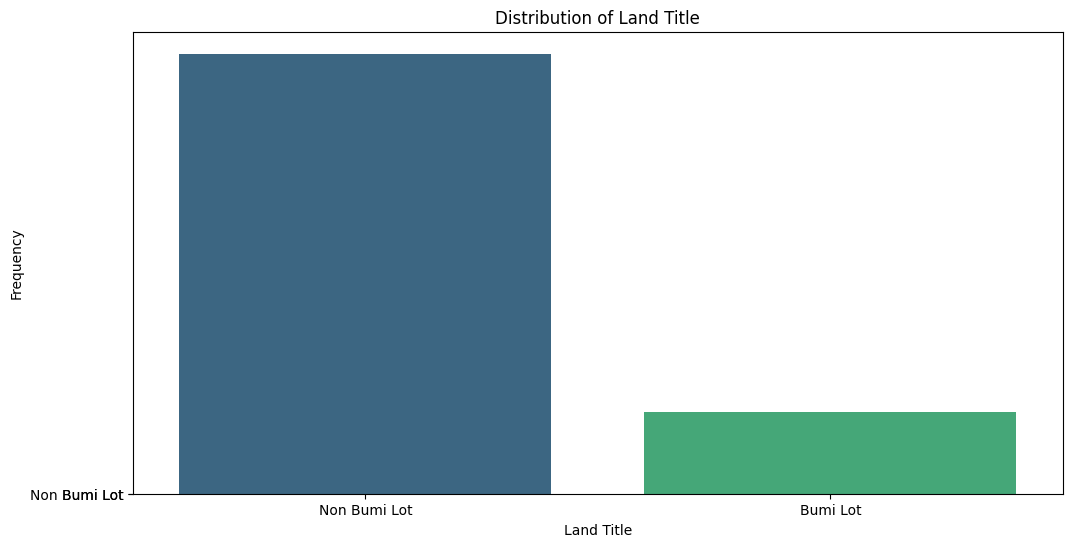

Summary Statistics for Land Title:
Land Title
Non Bumi Lot    3337
Bumi Lot         623
Name: count, dtype: int64


In [2233]:
# 'Land Title' Distribution

# Get Land Title distribution and sort by frequency
land_title_distribution = df['Land Title'].value_counts().sort_values(ascending=False)

# Convert Land Title to categorical with desired order
land_title_order = land_title_distribution.index
df['Land Title'] = pd.Categorical(df['Land Title'], categories=land_title_order, ordered=True)

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Land Title', y='Land Title', data=df, estimator=lambda x: len(x), palette="viridis", hue='Land Title')
plt.gca().invert_yaxis()
plt.title('Distribution of Land Title')
plt.xlabel('Land Title')
plt.ylabel('Frequency')
plt.show()

print("Summary Statistics for Land Title:")
print(land_title_distribution)


In [2234]:
# 'Facilities' Column

# Split the 'Facilities' column into separate binary columns for each facility
facilities_df = df['Facilities'].str.get_dummies(sep=', ')

# Concatenate the new facilities columns to the original DataFrame
df = pd.concat([df, facilities_df], axis=1)

# Drop the original 'Facilities' column
df.drop('Facilities', axis=1, inplace=True)
df.drop(['10'], axis=1, inplace=True)

# Display the modified DataFrame
print(df.head())


          State      Property Type Property Size Number of Bedroom  \
0  Kuala Lumpur  Service Residence   1000 sq.ft.                 4   
1        Melaka          Apartment    980 sq.ft.                 3   
2      Selangor          Apartment   1000 sq.ft.                 3   
3      Selangor               Flat    592 sq.ft.                 3   
4      Selangor             Studio    467 sq.ft.                 1   

  Number of Bathroom Parking Lot Floor Range  Age of Unit Tenure Type  \
0                  2           2      Medium           12    Freehold   
1                  2           1         Low           12    Freehold   
2                  2           1      Medium           17    Freehold   
3                  1           1      Medium           12   Leasehold   
4                  1           0         Low           12    Freehold   

     Land Title                                      Nearby School  \
0  Non Bumi Lot  Sekolah Menengah Pendidikan Khas Cacat Penglih...   


In [2235]:
df.columns

Index(['State', 'Property Type', 'Property Size', 'Number of Bedroom',
       'Number of Bathroom', 'Parking Lot', 'Floor Range', 'Age of Unit',
       'Tenure Type', 'Land Title', 'Nearby School', 'School', 'Mall',
       'Nearby Mall', 'Highway', 'Railway Station', 'Nearby Railway Station',
       'Bus Stop', 'Park', 'Hospital', 'price', 'Age of Unit Categorical',
       'Barbeque area', 'Club house', 'Gymnasium', 'Jogging Track', 'Lift',
       'Minimart', 'Multipurpose hall', 'Parking', 'Playground', 'Sauna',
       'Security', 'Squash Court', 'Swimming Pool', 'Tennis Court'],
      dtype='object')

In [2236]:
# Drop unnecessary columns from 'Facilities'

df.drop(['Lift', 'Parking', 'Squash Court', 'Tennis Court', 'Security', 'Sauna', 'Barbeque area' ], axis=1, inplace=True)

In [2237]:
df.columns

Index(['State', 'Property Type', 'Property Size', 'Number of Bedroom',
       'Number of Bathroom', 'Parking Lot', 'Floor Range', 'Age of Unit',
       'Tenure Type', 'Land Title', 'Nearby School', 'School', 'Mall',
       'Nearby Mall', 'Highway', 'Railway Station', 'Nearby Railway Station',
       'Bus Stop', 'Park', 'Hospital', 'price', 'Age of Unit Categorical',
       'Club house', 'Gymnasium', 'Jogging Track', 'Minimart',
       'Multipurpose hall', 'Playground', 'Swimming Pool'],
      dtype='object')

In [2238]:
# Handling missing data for Facilities

# List of facilities columns
facilities_columns = ['Gymnasium', 'Swimming Pool', 'Jogging Track', 'Playground', 'Minimart', 
                      'Multipurpose hall', 'Club house']

# Replace NaN with 0 and non-NaN with 1 for all facilities columns
for column in facilities_columns:
    df[column] = df[column].fillna(0).astype(int)

# Display the updated DataFrame
print(df.head())

          State      Property Type Property Size Number of Bedroom  \
0  Kuala Lumpur  Service Residence   1000 sq.ft.                 4   
1        Melaka          Apartment    980 sq.ft.                 3   
2      Selangor          Apartment   1000 sq.ft.                 3   
3      Selangor               Flat    592 sq.ft.                 3   
4      Selangor             Studio    467 sq.ft.                 1   

  Number of Bathroom Parking Lot Floor Range  Age of Unit Tenure Type  \
0                  2           2      Medium           12    Freehold   
1                  2           1         Low           12    Freehold   
2                  2           1      Medium           17    Freehold   
3                  1           1      Medium           12   Leasehold   
4                  1           0         Low           12    Freehold   

     Land Title                                      Nearby School  \
0  Non Bumi Lot  Sekolah Menengah Pendidikan Khas Cacat Penglih...   


In [2239]:
# 'Nearby Facilities' Column

# List of columns for nearby facilities
nearby_facilities_columns = ['Nearby School', 'School', 'Mall', 'Nearby Mall',
                             'Highway', 'Railway Station', 'Nearby Railway Station',
                             'Bus Stop', 'Park', 'Hospital']

# Assign boolean values based on the presence of nearby facilities (One Hot encoding)
for column in nearby_facilities_columns:
    df[f'{column}'] = df[column].notnull().astype(int)


# Display the modified DataFrame
print(df.head())


          State      Property Type Property Size Number of Bedroom  \
0  Kuala Lumpur  Service Residence   1000 sq.ft.                 4   
1        Melaka          Apartment    980 sq.ft.                 3   
2      Selangor          Apartment   1000 sq.ft.                 3   
3      Selangor               Flat    592 sq.ft.                 3   
4      Selangor             Studio    467 sq.ft.                 1   

  Number of Bathroom Parking Lot Floor Range  Age of Unit Tenure Type  \
0                  2           2      Medium           12    Freehold   
1                  2           1         Low           12    Freehold   
2                  2           1      Medium           17    Freehold   
3                  1           1      Medium           12   Leasehold   
4                  1           0         Low           12    Freehold   

     Land Title  Nearby School  School  Mall  Nearby Mall  Highway  \
0  Non Bumi Lot              1       1     1            1        0   


In [2240]:
# Rearrange columns

# Define the desired column order
desired_columns = ['State', 'Property Type', 'Property Size', 'Number of Bedroom', 'Number of Bathroom', 
                   'Parking Lot', 'Floor Range', 'Age of Unit', 'Tenure Type', 'Land Title', 'Gymnasium', 
                   'Swimming Pool', 'Jogging Track', 'Playground', 'Minimart', 'Multipurpose hall', 'Club house',
                   'Railway Station', 'Bus Stop', 'Highway', 'Mall', 'School', 'Hospital', 'Park', 'price']

# Reindex the DataFrame
df = df.reindex(columns=desired_columns)

# Display the updated DataFrame
print(df.head())


          State      Property Type Property Size Number of Bedroom  \
0  Kuala Lumpur  Service Residence   1000 sq.ft.                 4   
1        Melaka          Apartment    980 sq.ft.                 3   
2      Selangor          Apartment   1000 sq.ft.                 3   
3      Selangor               Flat    592 sq.ft.                 3   
4      Selangor             Studio    467 sq.ft.                 1   

  Number of Bathroom Parking Lot Floor Range  Age of Unit Tenure Type  \
0                  2           2      Medium           12    Freehold   
1                  2           1         Low           12    Freehold   
2                  2           1      Medium           17    Freehold   
3                  1           1      Medium           12   Leasehold   
4                  1           0         Low           12    Freehold   

     Land Title  Gymnasium  Swimming Pool  Jogging Track  Playground  \
0  Non Bumi Lot          0              0              0           0

In [2241]:
df.describe(include = 'all')

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
count,3875,3960,3960,3960,3960,3960,3960,3960.000000,3960,3960,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960
unique,15,7,842,8,8,9,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555
top,Selangor,Condominium,700 sq.ft.,3,2,1,Medium,NaN,Freehold,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM 380 000
freq,1293,1709,199,2907,3098,1556,2438,NaN,2407,3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.362879,NaN,NaN,0.491919,0.600505,0.349242,0.681566,0.399747,0.324495,0.153788,0.122475,0.177525,0.035354,0.118939,0.237879,0.085354,0.201768,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.587160,NaN,NaN,0.499998,0.489856,0.476791,0.465928,0.489908,0.468245,0.360791,0.327875,0.382161,0.184695,0.323758,0.425838,0.279442,0.401370,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [2242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   State               3875 non-null   object  
 1   Property Type       3960 non-null   object  
 2   Property Size       3960 non-null   object  
 3   Number of Bedroom   3960 non-null   category
 4   Number of Bathroom  3960 non-null   category
 5   Parking Lot         3960 non-null   category
 6   Floor Range         3960 non-null   category
 7   Age of Unit         3960 non-null   int32   
 8   Tenure Type         3960 non-null   category
 9   Land Title          3960 non-null   category
 10  Gymnasium           3960 non-null   int32   
 11  Swimming Pool       3960 non-null   int32   
 12  Jogging Track       3960 non-null   int32   
 13  Playground          3960 non-null   int32   
 14  Minimart            3960 non-null   int32   
 15  Multipurpose hall   3960 non-null   int32  

In [2243]:
# 'State' column has missing values (State-3875, Others-3960)

# Drop rows with missing values in 'State' column
df.dropna(subset=['State'], inplace=True)

# Display the updated DataFrame
print(df.head())

          State      Property Type Property Size Number of Bedroom  \
0  Kuala Lumpur  Service Residence   1000 sq.ft.                 4   
1        Melaka          Apartment    980 sq.ft.                 3   
2      Selangor          Apartment   1000 sq.ft.                 3   
3      Selangor               Flat    592 sq.ft.                 3   
4      Selangor             Studio    467 sq.ft.                 1   

  Number of Bathroom Parking Lot Floor Range  Age of Unit Tenure Type  \
0                  2           2      Medium           12    Freehold   
1                  2           1         Low           12    Freehold   
2                  2           1      Medium           17    Freehold   
3                  1           1      Medium           12   Leasehold   
4                  1           0         Low           12    Freehold   

     Land Title  Gymnasium  Swimming Pool  Jogging Track  Playground  \
0  Non Bumi Lot          0              0              0           0

In [2244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   State               3875 non-null   object  
 1   Property Type       3875 non-null   object  
 2   Property Size       3875 non-null   object  
 3   Number of Bedroom   3875 non-null   category
 4   Number of Bathroom  3875 non-null   category
 5   Parking Lot         3875 non-null   category
 6   Floor Range         3875 non-null   category
 7   Age of Unit         3875 non-null   int32   
 8   Tenure Type         3875 non-null   category
 9   Land Title          3875 non-null   category
 10  Gymnasium           3875 non-null   int32   
 11  Swimming Pool       3875 non-null   int32   
 12  Jogging Track       3875 non-null   int32   
 13  Playground          3875 non-null   int32   
 14  Minimart            3875 non-null   int32   
 15  Multipurpose hall   3875 non-null   int32  

In [2245]:
# 'Price' Formatting

df['price'] = df['price'].str.replace('RM', '').str.replace(' ', '').str.strip().astype(int)
df.head(5)

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
0,Kuala Lumpur,Service Residence,1000 sq.ft.,4,2,2,Medium,12,Freehold,Non Bumi Lot,0,0,0,0,0,0,0,0,1,0,1,1,1,1,340000
1,Melaka,Apartment,980 sq.ft.,3,2,1,Low,12,Freehold,Non Bumi Lot,0,1,1,1,0,0,0,0,0,0,0,0,0,0,250000
2,Selangor,Apartment,1000 sq.ft.,3,2,1,Medium,17,Freehold,Non Bumi Lot,0,0,1,1,1,0,0,0,0,1,0,0,0,0,230000
3,Selangor,Flat,592 sq.ft.,3,1,1,Medium,12,Leasehold,Non Bumi Lot,0,0,1,1,1,0,0,0,0,0,0,0,0,0,158000
4,Selangor,Studio,467 sq.ft.,1,1,0,Low,12,Freehold,Bumi Lot,1,0,0,0,1,0,0,0,1,0,1,1,1,1,305000


In [2246]:
# 'Property Size' Formatting

df['Property Size'] = df['Property Size'].str.replace(' sq.ft.', '').str.replace(' ', '').str.strip().astype(int)
df.head(5)

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
0,Kuala Lumpur,Service Residence,1000,4,2,2,Medium,12,Freehold,Non Bumi Lot,0,0,0,0,0,0,0,0,1,0,1,1,1,1,340000
1,Melaka,Apartment,980,3,2,1,Low,12,Freehold,Non Bumi Lot,0,1,1,1,0,0,0,0,0,0,0,0,0,0,250000
2,Selangor,Apartment,1000,3,2,1,Medium,17,Freehold,Non Bumi Lot,0,0,1,1,1,0,0,0,0,1,0,0,0,0,230000
3,Selangor,Flat,592,3,1,1,Medium,12,Leasehold,Non Bumi Lot,0,0,1,1,1,0,0,0,0,0,0,0,0,0,158000
4,Selangor,Studio,467,1,1,0,Low,12,Freehold,Bumi Lot,1,0,0,0,1,0,0,0,1,0,1,1,1,1,305000


In [2247]:
#Dtype Conversion
df['State'] = df['State'].astype('category')

df['Property Type'] = df['Property Type'].astype('category')

df['Number of Bedroom'] = df['Number of Bedroom'].astype(int)
df['Number of Bedroom'].fillna(int(df['Number of Bedroom'].mean()), inplace = True)

df['Number of Bathroom'] = df['Number of Bathroom'].astype(int)
df['Number of Bathroom'].fillna(int(df['Number of Bathroom'].mean()), inplace = True)

df['Parking Lot'] = pd.to_numeric(df['Parking Lot'], errors='coerce')
df['Parking Lot'].fillna(int(df['Parking Lot'].mean()), inplace = True)
df['Parking Lot'] = df['Parking Lot'].astype(int)

df['Floor Range'] = df['Floor Range'].astype('category')

df['Tenure Type'] = df['Tenure Type'].astype('category')

df['Land Title'] = df['Land Title'].astype('category')

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   State               3875 non-null   category
 1   Property Type       3875 non-null   category
 2   Property Size       3875 non-null   int32   
 3   Number of Bedroom   3875 non-null   int32   
 4   Number of Bathroom  3875 non-null   int32   
 5   Parking Lot         3875 non-null   int32   
 6   Floor Range         3875 non-null   category
 7   Age of Unit         3875 non-null   int32   
 8   Tenure Type         3875 non-null   category
 9   Land Title          3875 non-null   category
 10  Gymnasium           3875 non-null   int32   
 11  Swimming Pool       3875 non-null   int32   
 12  Jogging Track       3875 non-null   int32   
 13  Playground          3875 non-null   int32   
 14  Minimart            3875 non-null   int32   
 15  Multipurpose hall   3875 non-null   int32  

In [2248]:
df.describe()

,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Age of Unit,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3.875000e+03
mean,1032.507097,2.913806,2.016000,1.044645,12.370839,0.493935,0.601290,0.351226,0.685161,0.404387,0.328000,0.155097,0.125161,0.181419,0.036129,0.121548,0.243097,0.087226,0.206194,4.190782e+05
std,2042.127446,0.686023,0.601368,0.909037,5.647860,0.500028,0.489696,0.477415,0.464512,0.490836,0.469545,0.362044,0.330944,0.385415,0.186635,0.326806,0.429008,0.282202,0.404623,3.258818e+05
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000e+04
25%,750.000000,3.000000,2.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+05
50%,900.000000,3.000000,2.000000,1.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+05
75%,1114.500000,3.000000,2.000000,2.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+05
max,122774.000000,10.000000,8.000000,10.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.016000e+06


In [2249]:
# Converting Categorical data to Numerical (Label Encoding)

# State
df['State'] = label_encoder.fit_transform(df['State'])

# Property Type
df['Property Type'] = label_encoder.fit_transform(df['Property Type'])

# Floor Range
df['Floor Range'] = label_encoder.fit_transform(df['Floor Range'])

# Tenure Type
df['Tenure Type'] = label_encoder.fit_transform(df['Tenure Type'])

# Land Title
df['Land Title'] = label_encoder.fit_transform(df['Land Title'])

In [2250]:
df.head(10)

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
0,3,4,1000,4,2,2,2,12,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,340000
1,5,0,980,3,2,1,1,12,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,250000
2,13,0,1000,3,2,1,2,17,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,230000
3,13,3,592,3,1,1,2,12,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,158000
4,13,5,467,1,1,0,1,12,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,305000
5,8,1,1100,3,2,1,1,14,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,425000
6,13,1,780,3,2,1,2,12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,230000
7,13,0,852,3,2,1,2,24,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1,200000
8,13,0,918,3,2,1,2,12,1,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,275000
9,13,0,850,3,2,2,2,14,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,300000


In [2251]:
df.describe(include = 'all')

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3.875000e+03
mean,8.183742,1.151226,1032.507097,2.913806,2.016000,1.044645,1.402839,12.370839,0.391742,0.840774,0.493935,0.601290,0.351226,0.685161,0.404387,0.328000,0.155097,0.125161,0.181419,0.036129,0.121548,0.243097,0.087226,0.206194,4.190782e+05
std,4.533338,1.351244,2042.127446,0.686023,0.601368,0.909037,0.815785,5.647860,0.488203,0.365934,0.500028,0.489696,0.477415,0.464512,0.490836,0.469545,0.362044,0.330944,0.385415,0.186635,0.326806,0.429008,0.282202,0.404623,3.258818e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000e+04
25%,3.000000,0.000000,750.000000,3.000000,2.000000,0.000000,1.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+05
50%,8.000000,1.000000,900.000000,3.000000,2.000000,1.000000,2.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+05
75%,13.000000,1.000000,1114.500000,3.000000,2.000000,2.000000,2.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+05
max,14.000000,6.000000,122774.000000,10.000000,8.000000,10.000000,2.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.016000e+06


In [2252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   State               3875 non-null   int32
 1   Property Type       3875 non-null   int32
 2   Property Size       3875 non-null   int32
 3   Number of Bedroom   3875 non-null   int32
 4   Number of Bathroom  3875 non-null   int32
 5   Parking Lot         3875 non-null   int32
 6   Floor Range         3875 non-null   int32
 7   Age of Unit         3875 non-null   int32
 8   Tenure Type         3875 non-null   int32
 9   Land Title          3875 non-null   int32
 10  Gymnasium           3875 non-null   int32
 11  Swimming Pool       3875 non-null   int32
 12  Jogging Track       3875 non-null   int32
 13  Playground          3875 non-null   int32
 14  Minimart            3875 non-null   int32
 15  Multipurpose hall   3875 non-null   int32
 16  Club house          3875 non-null   int32
 17  

In [2253]:
summary_stats = df.describe()
summary_stats

,State,Property Type,Property Size,Number of Bedroom,Number of Bathroom,Parking Lot,Floor Range,Age of Unit,Tenure Type,Land Title,Gymnasium,Swimming Pool,Jogging Track,Playground,Minimart,Multipurpose hall,Club house,Railway Station,Bus Stop,Highway,Mall,School,Hospital,Park,price
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3.875000e+03
mean,8.183742,1.151226,1032.507097,2.913806,2.016000,1.044645,1.402839,12.370839,0.391742,0.840774,0.493935,0.601290,0.351226,0.685161,0.404387,0.328000,0.155097,0.125161,0.181419,0.036129,0.121548,0.243097,0.087226,0.206194,4.190782e+05
std,4.533338,1.351244,2042.127446,0.686023,0.601368,0.909037,0.815785,5.647860,0.488203,0.365934,0.500028,0.489696,0.477415,0.464512,0.490836,0.469545,0.362044,0.330944,0.385415,0.186635,0.326806,0.429008,0.282202,0.404623,3.258818e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000e+04
25%,3.000000,0.000000,750.000000,3.000000,2.000000,0.000000,1.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+05
50%,8.000000,1.000000,900.000000,3.000000,2.000000,1.000000,2.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+05
75%,13.000000,1.000000,1114.500000,3.000000,2.000000,2.000000,2.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+05
max,14.000000,6.000000,122774.000000,10.000000,8.000000,10.000000,2.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.016000e+06


In [2254]:
# Check for outliers

Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

# Potential outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the potential outliers
potential_outliers = df[(df < lower_bound) | (df > upper_bound)]
print(potential_outliers.sum())

State                         0.0
Property Type              2790.0
Property Size            552589.0
Number of Bedroom          2750.0
Number of Bathroom         1740.0
Parking Lot                  44.0
Floor Range                   0.0
Age of Unit               16161.0
Tenure Type                   0.0
Land Title                    0.0
Gymnasium                     0.0
Swimming Pool                 0.0
Jogging Track                 0.0
Playground                    0.0
Minimart                      0.0
Multipurpose hall             0.0
Club house                  601.0
Railway Station             485.0
Bus Stop                    703.0
Highway                     140.0
Mall                        471.0
School                      942.0
Hospital                    338.0
Park                        799.0
price                 295005213.0
dtype: float64


In [2255]:
# TODO: 
# - Data Type Conversion
# - Handle Categorical Variables
# - Normalize/Scale Features
# - Handle Missing Values
# - Feature Engineering
# - Remove Unnecessary Features
# - Train Test Split
# - Model Selection




# - Change Completion Year to Age of Unit ✅
# - Get State from Address ✅
# - Modify Price formatting ✅
# - Modify Property Size formatting ✅
# - Do Type Handling ✅
# - Handle Missing Values ✅
# - Make Facilties Column and Nearby Facilities ✅